<a href="https://colab.research.google.com/github/RomuloAlves2507/TrabalhoIA_unila_/blob/main/atividade1_IAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

nomeArquivo = ["CE.txt", "CP.txt", "EPS1.txt", "FS1.txt", "FS2.txt", "PS1.txt", "PS2.txt", "PS3.txt", "PS4.txt", "PS5.txt", "PS6.txt", "SE.txt", "TS1.txt", "TS2.txt", "TS3.txt", "TS4.txt", "VS1.txt"]
caminho = "/content/drive/MyDrive/Unila/Ia/Data/"

Montando o drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = caminho + nomeArquivo[0]

In [ ]:
data = open(filename, "r")

In [ ]:
i=0
print(data.readline())
for linha in data.read():
  print(linha)


In [ ]:
for i, col in enumerate(data.columns):
    print(f"Coluna {i+1}: {col}")

Coluna 1: 47.202	47.273	47.25	47.332	47.213	47.372	47.273	47.438	46.691	46.599	46.623	46.653	46.136	46.127	45.948	45.935	45.726	45.139	44.978	44.937	44.269	44.079	43.741	43.375	42.847	42.322	42.322	41.797	41.406	40.924	40.427	39.857	39.517	38.999	38.493	37.954	37.552	37.084	36.615	36.098	35.58	35.141	34.184	34.177	33.739	33.226	32.913	32.4	31.833	31.862	31.554	30.953	30.639	30.561	30.368	30.224	29.79	29.261	29.287	28.866


In [ ]:
dado_faltando = data.isnull().sum()
print(dado_faltando)

47.202\t47.273\t47.25\t47.332\t47.213\t47.372\t47.273\t47.438\t46.691\t46.599\t46.623\t46.653\t46.136\t46.127\t45.948\t45.935\t45.726\t45.139\t44.978\t44.937\t44.269\t44.079\t43.741\t43.375\t42.847\t42.322\t42.322\t41.797\t41.406\t40.924\t40.427\t39.857\t39.517\t38.999\t38.493\t37.954\t37.552\t37.084\t36.615\t36.098\t35.58\t35.141\t34.184\t34.177\t33.739\t33.226\t32.913\t32.4\t31.833\t31.862\t31.554\t30.953\t30.639\t30.561\t30.368\t30.224\t29.79\t29.261\t29.287\t28.866    0
dtype: int64


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1784239306.py:21: SyntaxWarning: invalid escape sequence '\s'
  targets_df = pd.read_csv(caminho_profile, header=None, sep='\s+', names=target_cols)


--- Etapa 1: Carregando as variáveis-alvo ---
Arquivo 'profile.txt' carregado com sucesso.
Dimensões do DataFrame de alvos: (2205, 5)
------------------------------ 

--- Etapa 2: Filtrando dados para ciclos estáveis ---
Dados filtrados. Novas dimensões de X: (1449, 43680)
Novas dimensões dos alvos: (1449, 5)
------------------------------ 

--- Etapa 3: Definindo o alvo e dividindo os dados ---
Dados divididos em treino e teste:
X_train shape: (1014, 43680)
X_test shape: (435, 43680)
------------------------------ 

--- Etapa 4: Construindo e treinando o pipeline ---
Modelo treinado com sucesso!
------------------------------ 

--- Etapa 5: Fazendo predições e avaliando o modelo ---
Acurácia do Modelo (Resfriador): 100.00%
✅ SUCESSO! A meta de 95.0% de acurácia foi atingida.

Relatório de Classificação:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       144
          20       1.00      1.00      1.00       144
         100       1.

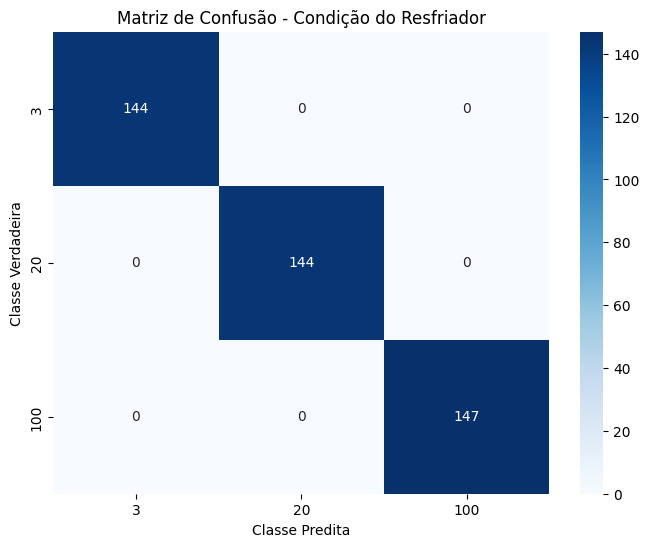

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que a matriz 'X' foi carregada e combinada no passo anterior
# X.shape deveria ser (2205, 43680)

# --- Etapa 1: Carregar as Variáveis-Alvo (y) ---
print("--- Etapa 1: Carregando as variáveis-alvo ---")
caminho_profile = os.path.join(caminho, "profile.txt")

# Definindo os nomes das colunas conforme o relatório
target_cols = ['cooler_condition', 'valve_condition', 'pump_leakage', 'accumulator_pressure', 'stable_flag']
targets_df = pd.read_csv(caminho_profile, header=None, sep='\s+', names=target_cols)

print("Arquivo 'profile.txt' carregado com sucesso.")
print(f"Dimensões do DataFrame de alvos: {targets_df.shape}")
print("-" * 30, "\n")


# --- Etapa 2: Filtrar Dados por Condição Estável ---
print("--- Etapa 2: Filtrando dados para ciclos estáveis ---")
# [cite_start]O seu relatório menciona que o 'stable_flag' pode ser usado para filtrar os dados [cite: 390]
# [cite_start]0: Condições estáveis (1449 instâncias) [cite: 458]
# [cite_start]1: Condições instáveis (756 instâncias) [cite: 459]
stable_indices = targets_df[targets_df['stable_flag'] == 0].index

# Filtrando tanto X quanto targets_df para manter apenas os dados estáveis
X_stable = X.loc[stable_indices]
targets_stable = targets_df.loc[stable_indices]

print(f"Dados filtrados. Novas dimensões de X: {X_stable.shape}")
print(f"Novas dimensões dos alvos: {targets_stable.shape}")
print("-" * 30, "\n")


# --- Etapa 3: Definir o Alvo e Dividir os Dados ---
print("--- Etapa 3: Definindo o alvo e dividindo os dados ---")
# [cite_start]Vamos focar no primeiro alvo: Condição do Resfriador (cooler_condition) [cite: 438]
y = targets_stable['cooler_condition']

# Dividindo os dados em treino (70%) e teste (30%)
# 'stratify=y' garante que a proporção das classes seja a mesma nos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_stable, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Dados divididos em treino e teste:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("-" * 30, "\n")


# --- Etapa 4: Construir e Treinar o Pipeline do Modelo ---
print("--- Etapa 4: Construindo e treinando o pipeline ---")
# O pipeline irá:
# 1. Padronizar os dados (StandardScaler)
# 2. Reduzir a dimensionalidade (PCA)
# 3. Treinar o classificador (LogisticRegression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Treinando o pipeline com os dados de treino
pipeline.fit(X_train, y_train)

print("Modelo treinado com sucesso!")
print("-" * 30, "\n")


# --- Etapa 5: Fazer Predições e Avaliar o Modelo ---
print("--- Etapa 5: Fazendo predições e avaliando o modelo ---")
# Fazendo predições no conjunto de teste
y_pred = pipeline.predict(X_test)

# [cite_start]A meta de desempenho para o Resfriador é > 95% de acurácia [cite: 405]
meta_resfriador = 0.95
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia do Modelo (Resfriador): {accuracy * 100:.2f}%")

if accuracy > meta_resfriador:
    print(f"✅ SUCESSO! A meta de {meta_resfriador*100}% de acurácia foi atingida.")
else:
    print(f"❌ ATENÇÃO! A meta de {meta_resfriador*100}% de acurácia NÃO foi atingida.")

# Relatório de Classificação Detalhado (precisão, recall, f1-score)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão para visualizar os erros
print("\nGerando Matriz de Confusão...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.unique(y),
    yticklabels=np.unique(y)
)
plt.title('Matriz de Confusão - Condição do Resfriador')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()